# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [71]:
# Dependencies and Setup
import pandas as pd
import requests
from pathlib import Path

# Import API key
from api_keys import geoapify_key

In [72]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
csv_file = Path("output_data/cities.csv")
city_data_df = pd.read_csv(csv_file)

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,edinburgh of the seven seas,-37.0676,-12.3116,14.12,14.12,100,6.07,SH,1685762182
1,1,road town,18.4167,-64.6167,28.19,28.19,100,8.06,VG,1685762183
2,2,jamestown,42.0970,-79.2353,23.80,15.85,0,2.06,US,1685762183
3,3,okhotsk,59.3833,143.3000,11.49,11.49,23,3.59,RU,1685762183
4,4,brookings,44.3114,-96.7984,22.19,20.21,0,4.63,US,1685762111


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

<AxesSubplot:>

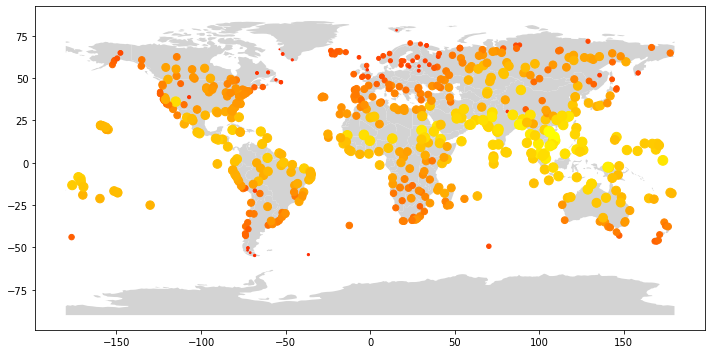

In [66]:
%%capture --no-display

# Configure the map plot
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gdp

worldmap = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(12, 12))

x = city_data_df['Lng']
y = city_data_df['Lat']
z = city_data_df['Humidity']
plt.scatter(x, y, s=3*z, c=z, alpha=1.0, cmap='autumn', zorder=10)

# Display the map
worldmap.plot(color='lightgrey', ax=ax, zorder=5)


### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [33]:
# Narrow down cities that fit criteria and drop any results with null values
nice_city_data_df = city_data_df[city_data_df['Max Temp'] < 27.0]
nice_city_data_df = nice_city_data_df[nice_city_data_df['Max Temp'] > 21.0]
nice_city_data_df = nice_city_data_df[nice_city_data_df['Wind Speed'] < 4.5]
nice_city_data_df = nice_city_data_df[nice_city_data_df['Cloudiness'] == 0]

# Drop any rows with null values
nice_city_data_df = nice_city_data_df.dropna()

# Display sample data
nice_city_data_df


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,2,jamestown,42.0970,-79.2353,23.80,15.85,0,2.06,US,1685762183
31,31,nacala,-14.5428,40.6728,21.82,21.82,0,0.73,MZ,1685762095
52,52,karratha,-20.7377,116.8463,25.97,25.97,0,3.60,AU,1685761658
66,66,uruzgan,32.8333,66.0000,22.95,22.95,0,2.35,AF,1685762217
108,108,lazaro cardenas,17.9583,-102.2000,26.44,26.44,0,2.69,MX,1685762238
112,112,kendallville,41.4414,-85.2650,22.69,19.55,0,0.00,US,1685762240
119,119,greenville,35.6127,-77.3663,21.19,20.09,0,0.00,US,1685762242
141,141,hamilton,39.1834,-84.5333,23.97,18.69,0,0.00,US,1685762253
147,147,hilton head island,32.2163,-80.7526,22.77,20.56,0,0.00,US,1685762218
154,154,lewistown,40.5992,-77.5714,25.67,20.45,0,0.00,US,1685762260


### Step 3: Create a new DataFrame called `hotel_df`.

In [34]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel_df = nice_city_data_df.copy()

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df['Hotel Name'] = ''

# Display sample data
hotel_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hotel Name
2,2,jamestown,42.0970,-79.2353,23.80,15.85,0,2.06,US,1685762183,
31,31,nacala,-14.5428,40.6728,21.82,21.82,0,0.73,MZ,1685762095,
52,52,karratha,-20.7377,116.8463,25.97,25.97,0,3.60,AU,1685761658,
66,66,uruzgan,32.8333,66.0000,22.95,22.95,0,2.35,AF,1685762217,
108,108,lazaro cardenas,17.9583,-102.2000,26.44,26.44,0,2.69,MX,1685762238,
112,112,kendallville,41.4414,-85.2650,22.69,19.55,0,0.00,US,1685762240,
119,119,greenville,35.6127,-77.3663,21.19,20.09,0,0.00,US,1685762242,
141,141,hamilton,39.1834,-84.5333,23.97,18.69,0,0.00,US,1685762253,
147,147,hilton head island,32.2163,-80.7526,22.77,20.56,0,0.00,US,1685762218,
154,154,lewistown,40.5992,-77.5714,25.67,20.45,0,0.00,US,1685762260,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [35]:
# Set parameters to search for a hotel
radius = 10000
params = {
    'catetory': 'accomdation.hotel',
    'filter': 'circle:lon,lat,10000',
    'bias': 'proximity:lon,lat'
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    lat = row['Lat']
    lon = row['Lng']
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = 'circle:' + ','.join([str(lon), str(lat), str(10000)])
    params["bias"] = 'proximity:' + ','.join([str(lon), str(lat)])
    
    # Set base URL
    # This URL requires parameters e.g. &categories=accommodation.hotel&filter=circle:lon,lat,radiusMeters&bias=proximity:lon,lat
    base_url = "https://api.geoapify.com/v2/places" + '?categories=accommodation.hotel&apiKey=' + geoapify_key + '&filter=' + params['filter'] + '&bias=' + params['bias']


    # Make and API request using the params dictionary
    name_address = requests.get(base_url)
    
    # Convert the API response to JSON format
    name_address = name_address.json()
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search
jamestown - nearest hotel: DoubleTree Jamestown
nacala - nearest hotel: Indico Apart Hotel 2
karratha - nearest hotel: Karratha International Hotel
uruzgan - nearest hotel: No hotel found
lazaro cardenas - nearest hotel: Hotel Sol del Pacífico
kendallville - nearest hotel: Best Western
greenville - nearest hotel: Quality Inn
hamilton - nearest hotel: North Vista Manor
hilton head island - nearest hotel: Marriott's Harbour Point and Sunset Pointe
lewistown - nearest hotel: No hotel found
reggane - nearest hotel: No hotel found
slave lake - nearest hotel: Northwest Inn
kievka - nearest hotel: No hotel found
oliver - nearest hotel: Coast Oliver Hotel
afaahiti - nearest hotel: Omati Lodge
buka - nearest hotel: No hotel found
galliano - nearest hotel: Fairfield Inn & Suites by Marriott Cut Off-Galliano
atlantic beach - nearest hotel: One Ocean Resort & Spa
new richmond - nearest hotel: AmericInn
sault ste. marie - nearest hotel: Holiday Inn
newman - nearest hotel: No h

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hotel Name
2,2,jamestown,42.0970,-79.2353,23.80,15.85,0,2.06,US,1685762183,DoubleTree Jamestown
31,31,nacala,-14.5428,40.6728,21.82,21.82,0,0.73,MZ,1685762095,Indico Apart Hotel 2
52,52,karratha,-20.7377,116.8463,25.97,25.97,0,3.60,AU,1685761658,Karratha International Hotel
66,66,uruzgan,32.8333,66.0000,22.95,22.95,0,2.35,AF,1685762217,No hotel found
108,108,lazaro cardenas,17.9583,-102.2000,26.44,26.44,0,2.69,MX,1685762238,Hotel Sol del Pacífico
112,112,kendallville,41.4414,-85.2650,22.69,19.55,0,0.00,US,1685762240,Best Western
119,119,greenville,35.6127,-77.3663,21.19,20.09,0,0.00,US,1685762242,Quality Inn
141,141,hamilton,39.1834,-84.5333,23.97,18.69,0,0.00,US,1685762253,North Vista Manor
147,147,hilton head island,32.2163,-80.7526,22.77,20.56,0,0.00,US,1685762218,Marriott's Harbour Point and Sunset Pointe
154,154,lewistown,40.5992,-77.5714,25.67,20.45,0,0.00,US,1685762260,No hotel found


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

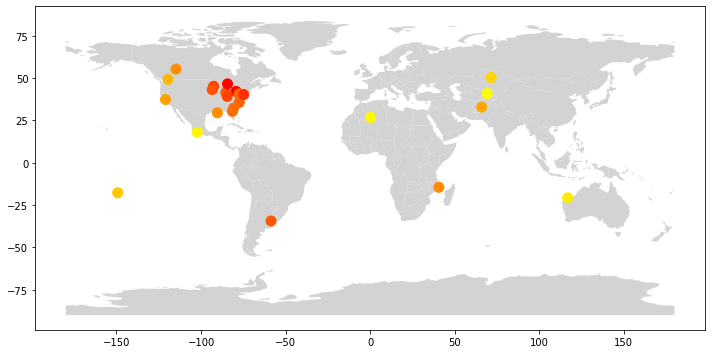

In [73]:
%%capture --no-display

# Configure the map plot
import mplcursors

worldmap = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(12, 12))
hotel_df = hotel_df.reset_index()
x = hotel_df['Lng']
y = hotel_df['Lat']
z = hotel_df['Humidity']
sc = plt.scatter(x, y, s=100, c=z, alpha=1.0, cmap='autumn', zorder=10)

def show_info(sel):
    ind = sel.target.index
    sel.annotation.set_text(f'Lng:{hotel_df.loc[ind, "Lng"]}\nLat:{hotel_df.loc[ind, "Lat"]}\nCity:{hotel_df.loc[ind, "City"]}\nHumidity:{hotel_df.loc[ind, "Humidity"]}\nHotel Name:{hotel_df.loc[ind, "Hotel Name"]}\nCountry:{hotel_df.loc[ind, "Country"]}')


mplcursors.cursor(hover=True).connect('add', show_info)

# Display the map
worldmap.plot(color='lightgrey', ax=ax, zorder=5)
plt.show()
